In [2]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



[1] "brazil"        "brics-dataset"

In [3]:
library(tidyverse)
library(readr)

In [4]:
data <- read_csv("../input/brazil/DEXBZUS.csv")

Rows: 7005 Columns: 2

── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): DEXBZUS
date (1): DATE


ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



In [5]:
typeof(data)

[1] "list"

In [6]:
spec(data)

cols(
  DATE = col_date(format = ""),
  DEXBZUS = col_character()
)

In [7]:
del_data = data[data$DATE <= as.Date("1999-12-31", "%Y-%m-%d"), ] 
data = data[data$DATE > as.Date("1999-12-31", "%Y-%m-%d"), ]

In [8]:
data = data[data$DEXBZUS != '.', ]

In [9]:
lengths(data)

DATE DEXBZUS 
   5482    5482

In [10]:
data

DATE,DEXBZUS
<date>,<chr>
2000-01-03,1.8050
2000-01-04,1.8405
2000-01-05,1.8560
2000-01-06,1.8400
2000-01-07,1.8310
2000-01-10,1.8190
2000-01-11,1.8225
2000-01-12,1.8350
2000-01-13,1.8140


In [11]:
date1 = as.Date("1999-12-31", "%Y-%m-%d")
date2 = data$DATE[length(data$DATE)]     #lengthof data is 5482

In [12]:
length = date2 - date1 #7980
length

Time difference of 7980 days

In [13]:
lst_val = 1:length
lst_val <- as.double(lst_val)

In [14]:
check_date = as.Date("2000-01-01", "%Y-%m-%d")
start_val = del_data$DEXBZUS[length(del_data$DATE)]

In [15]:
if(check_date != data$DATE[1]){
    num_missing = data$DATE[1] - check_date
    val = as.numeric(start_val) + as.numeric(data$DEXBZUS[1])
    val = val/2
    for(i in 1:num_missing){
        lst_val[i] = val
    }
    check_date <- check_date + num_missing
}

In [16]:
lst_val[3]

[1] 3

In [17]:
idx = 3
for (i in 1:length(data$DATE)){    
    if(check_date != data$DATE[i]){
        num_missing <- data$DATE[i] - check_date
        val <- as.numeric(data$DEXBZUS[i-1]) + as.numeric(data$DEXBZUS[i])
        val <- val/2
        for(j in (idx : (idx + as.numeric(num_missing-1)))){
#             print(j)
            lst_val[j] <- val
        }
        
        idx <- idx + as.numeric(num_missing)
        lst_val[idx] <- as.numeric(data$DEXBZUS[i])
        idx <- idx + 1
        check_date <- check_date + num_missing + 1
#         print(check_date)
    }
    
    else{
        lst_val[idx] <- as.numeric(data$DEXBZUS[i])
        idx <- idx + 1
        check_date <- check_date + 1
    }
}

In [18]:
lst_val

[1] 1.80700 1.80700 1.80500 1.84050 1.85600 1.84000 1.83100 1.82500 1.82500
  [10] 1.81900 1.82250 1.83500 1.81400 1.80500 1.79960 1.79960 1.79960 1.79420
  [19] 1.79300 1.77850 1.78000 1.77400 1.77400 1.76800 1.78000 1.78100 1.78000
  [28] 1.79000 1.79600 1.79600 1.80200 1.79500 1.78500 1.77500 1.77300 1.77150
  [37] 1.77150 1.77000 1.76500 1.77000 1.77000 1.76700 1.76800 1.76800 1.76900
  [46] 1.78300 1.77500 1.77700 1.77700 1.78100 1.78100 1.78100 1.78500 1.79000
  [55] 1.78200 1.77400 1.77650 1.77650 1.77900 1.76900 1.76900 1.75900 1.74400
  [64] 1.74550 1.74550 1.74700 1.74700 1.75400 1.73500 1.73800 1.74350 1.74350
  [73] 1.74900 1.73800 1.74020 1.73600 1.73700 1.73850 1.73850 1.74000 1.73950
  [82] 1.72900 1.72300 1.73000 1.73300 1.73300 1.73600 1.74900 1.74000 1.75300
  [91] 1.74200 1.74200 1.74200 1.74200 1.74500 1.75500 1.74500 1.74600 1.74200
 [100] 1.74200 1.73800 1.74750 1.74800 1.76400 1.78600 1.78750 1.78750 1.78900
 [109] 1.76600 1.76600 1.78100 1.77900 1.78450 1.78450 1.79000 1.79000 1.79900
 [118] 1.81100 1.80500 1.80600 1.80600 1.80700 1.80000 1.81600 1.81400 1.81250
 [127] 1.80875 1.80875 1.80500 1.80750 1.81800 1.82000 1.83000 1.83750 1.83750
 [136] 1.84500 1.82300 1.83300 1.83100 1.84300 1.84850 1.84850 1.85400 1.85200
 [145] 1.85300 1.84600 1.84100 1.83675 1.83675 1.83675 1.83250 1.82700 1.82100
 [154] 1.80700 1.80050 1.80050 1.79400 1.79300 1.80400 1.79900 1.80250 1.80375
 [163] 1.80375 1.80500 1.81200 1.81250 1.81200 1.80800 1.80650 1.80650 1.80500
 [172] 1.80000 1.81500 1.81300 1.82200 1.82500 1.82500 1.82800 1.82300 1.82000
 [181] 1.81700 1.80400 1.80650 1.80650 1.80900 1.80700 1.80500 1.79800 1.79900
 [190] 1.79950 1.79950 1.80000 1.79900 1.80500 1.80900 1.81200 1.80600 1.80600
 [199] 1.80000 1.79800 1.80700 1.80150 1.79400 1.79550 1.79550 1.79700 1.79000
 [208] 1.79300 1.78450 1.78600 1.78100 1.78100 1.77600 1.78600 1.79200 1.80200
 [217] 1.79300 1.79450 1.79450 1.79600 1.80000 1.79650 1.79800 1.79600 1.80000
 [226] 1.80000 1.80400 1.80500 1.80800 1.80900 1.81700 1.81900 1.81900 1.82100
 [235] 1.81800 1.81800 1.82200 1.82300 1.82600 1.82600 1.82900 1.83200 1.82410
 [244] 1.82000 1.82400 1.82590 1.82590 1.82590 1.82780 1.82100 1.82210 1.82200
 [253] 1.82035 1.82035 1.81870 1.82700 1.83500 1.83300 1.84450 1.85175 1.85175
 [262] 1.85900 1.85500 1.85700 1.85400 1.85750 1.85075 1.85075 1.84400 1.85170
 [271] 1.84900 1.84820 1.84400 1.84550 1.84550 1.84700 1.84800 1.85200 1.85200
 [280] 1.85500 1.85500 1.85500 1.85500 1.85500 1.86000 1.86200 1.87700 1.87400
 [289] 1.87400 1.87100 1.87350 1.87600 1.87500 1.88200 1.88750 1.88750 1.89300
 [298] 1.90100 1.92500 1.94600 1.93100 1.92475 1.92475 1.91850 1.90800 1.90900
 [307] 1.91900 1.93700 1.93900 1.93900 1.94100 1.95450 1.95500 1.96300 1.95100
 [316] 1.95500 1.95500 1.95900 1.94500 1.94900 1.94750 1.96800 1.94850 1.94850
 [325] 1.92900 1.92600 1.92900 1.94400 1.95900 1.96075 1.96075 1.96250 1.98000
 [334] 1.95800 1.97220 1.98100 1.98250 1.98250 1.98400 1.96000 1.96700 1.97400
 [343] 1.96900 1.96550 1.96550 1.96200 1.96800 1.96500 1.96500 1.96500 1.95900
 [352] 1.95900 1.95300 1.95500 1.95800 1.95300 1.95800 1.95950 1.95950 1.95950
 [361] 1.96100 1.96000 1.95500 1.95100 1.94450 1.94450 1.94450 1.93800 1.94600
 [370] 1.93800 1.95300 1.95350 1.95350 1.95400 1.94100 1.94100 1.94900 1.94900
 [379] 1.95150 1.95150 1.95150 1.95400 1.95400 1.95300 1.96000 1.95900 1.95900
 [388] 1.95800 1.95900 1.96200 1.97400 1.97700 1.97700 1.97700 1.97700 1.96950
 [397] 1.97200 1.98250 1.99400 1.99500 1.99500 1.99600 1.99700 2.00600 1.99200
 [406] 1.98600 1.98450 1.98450 1.98300 1.98200 1.98900 1.98400 1.99300 2.00100
 [415] 2.00100 2.00100 2.00900 2.01900 2.04400 2.04700 2.03850 2.03850 2.03000
 [424] 2.03400 2.04650 2.04300 2.03200 2.02850 2.02850 2.02500 2.02200 2.04700
 [433] 2.04300 2.05700 2.06100 2.06100 2.06500 2.06200 2.07500 2.10250 2.12900
 [442] 2.15000 2.15000 2.17100 2.10000 2.10700 2.14600 2.17200 2.15400 2.15400
 [451] 2.13600 2.12400 2.12500 2.14300 2.17500 2.1665

In [19]:
print("Enter 0 if you want the test data to start from 2020 and 1 if you want the test data to start from 2021")
offset = readline()
offset = as.integer(offset)

[1] "Enter 0 if you want the test data to start from 2020 and 1 if you want the test data to start from 2021"


 1


In [20]:
test_date = as.Date("2021-01-01", "%Y-%m-%d")
if(offset == 0){
    test_date = as.Date("2020-01-01", "%Y-%m-%d")
}

In [21]:
train = lst_val[1: as.numeric(test_date - date1) - 1]

In [22]:
length(train)

[1] 7671

In [23]:
test = lst_val[as.numeric(test_date - date1) : length(lst_val)]

In [24]:
train_week <- list(1 : ceiling(length(train)/7))
for(i in 0 : as.integer(length(train)/7)){
    if(i == as.integer(length(train)/7)){
        train_week[i+1] <- mean(train[((7*i)+1) : (length(train))])
        next
    }

    train_week[i+1] <- mean(train[((7*i)+1) : ((7*i)+7)])
}

In [25]:
test_week <- list(1 : ceiling(length(test)/7))

for(i in 0 : as.integer(length(test)/7)){
    if(i == as.integer(length(test)/7)){
        test_week[i+1] <- mean(test[((7*i)+1) : (length(test))])
        next
    }

    test_week[i+1] <- mean(test[((7*i)+1) : ((7*i)+7)])
}

In [26]:
train <- ts(as.numeric(train_week))
test <- ts(as.numeric(test_week), start = length(train_week)+1,
           end = (length(train_week) + length(test_week)))
#converting to time series

In [27]:
install.packages("WaveletArima")
library(WaveletArima)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



In [28]:
library(tseries)
library(forecast)
library(Metrics)
library(ggplot2)
library(readr)
# library(WaveletArima)
library(caret)
library(nnfor)
library(tsDyn)
library(fracdiff)
library(bsts)
library(forecastHybrid)
library(e1071)
library(tseriesChaos)
library(pracma)
library(Kendall)
# library(nonlinearTseries)
# library(GeneCycle)
library(fpp2)
library(lmtest)


Attaching package: ‘Metrics’


The following object is masked from ‘package:forecast’:

    accuracy


Loading required package: lattice


Attaching package: ‘caret’


The following objects are masked from ‘package:Metrics’:

    precision, recall


The following object is masked from ‘package:purrr’:

    lift


The following object is masked from ‘package:httr’:

    progress


Registered S3 method overwritten by 'greybox':
  method     from
  print.pcor lava


Attaching package: ‘tsDyn’


The following object is masked from ‘package:Metrics’:

    mse


Loading required package: BoomSpikeSlab

Loading required package: Boom

Loading required package: MASS


Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select



Attaching package: ‘Boom’


The following object is masked from ‘package:stats’:

    rWishart



Attaching package: ‘BoomSpikeSlab’


The following object is masked from ‘package:stats’:

    knots


Loading required package: zoo


A

In [29]:
length(test)

[1] 45

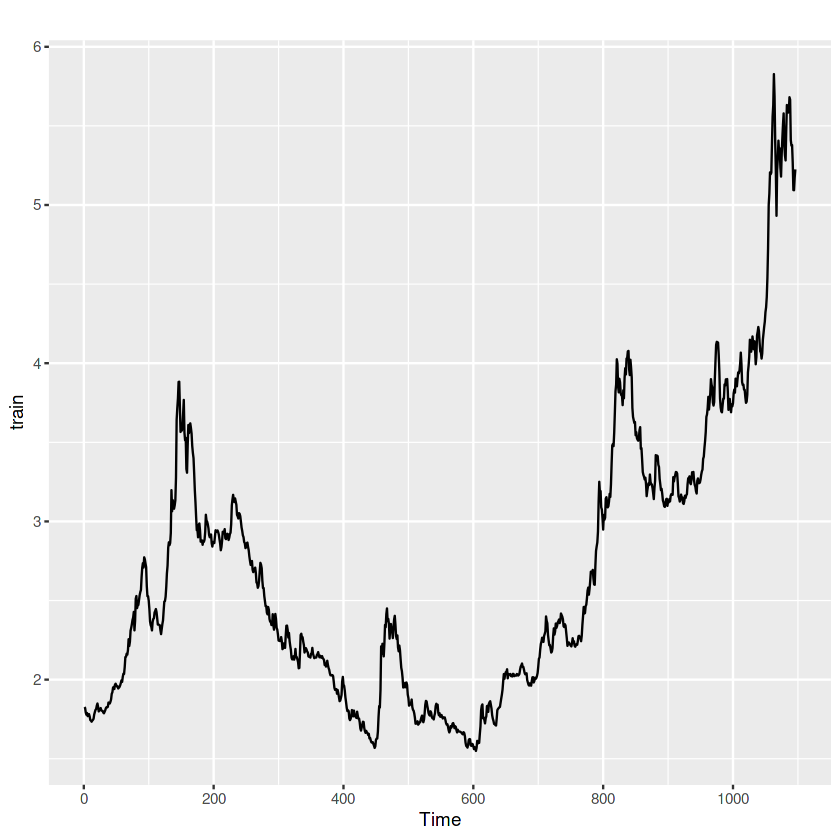

In [30]:
autoplot(train)

In [31]:
#ACF & PACF plots
#diffcase=ndiffs(train)
diffset = diff(train, differences = ndiffs(train))

jpeg(file="ACF_Brazil.jpeg")
ggAcf(diffset) +
  ggtitle("ACF plot")
dev.off()

jpeg(file="PACF_Brazil.jpeg")

ggPacf(train) +
  ggtitle("PACF plot")
dev.off()

png 
  2

png 
  2

In [32]:
kpss.test(train)  #p value is < 0.05... So,reject null hypothesis and accept alternative hypothisis which is non stationary 

Warning message in kpss.test(train):
“p-value smaller than printed p-value”



	KPSS Test for Level Stationarity

data:  train
KPSS Level = 5.4646, Truncation lag parameter = 7, p-value = 0.01


In [33]:
Box.test(train,lag=20,type="Ljung-Box")  #p<0.01... So, no seriel correlation exists


	Box-Ljung test

data:  train
X-squared = 18803, df = 20, p-value < 2.2e-16


In [34]:
skewness(train)   #Right Skew

[1] 1.109236

In [35]:
kurtosis(train)   #Peaked distribution

[1] 0.9486601

In [36]:
hurstexp(train)  #Which exponent to consider  #Emperical

Simple R/S Hurst estimation:         0.8508158 
Corrected R over S Hurst exponent:   0.9928907 
Empirical Hurst exponent:            0.9727742 
Corrected empirical Hurst exponent:  0.9541271 
Theoretical Hurst exponent:          0.5381524 


In [37]:
terasvirta.test(train) 
#Also a test for linearity... p-value is greater than 0.05, hence linear trend


	Teraesvirta Neural Network Test

data:  train
X-squared = 5.312, df = 2, p-value = 0.07023


In [38]:
#Non-Chaotic
max_lyapunov_expo <-lyap_k(train, m=1, d=2, s=1, t=4, ref=length(train), k=2, eps=4); max_lyapunov_expo

Finding nearests
Keeping  1096  reference points
Following points


A Time Series:
[1] -6.497258

# **Models**


z test of coefficients:

    Estimate Std. Error z value  Pr(>|z|)    
ar1 0.298262   0.028831  10.345 < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1



Call:
arima(x = train, order = c(1, 1, 0))

Coefficients:
         ar1
      0.2983
s.e.  0.0288

sigma^2 estimated as 0.002669:  log likelihood = 1690.83,  aic = -3377.66

Training set error measures:
                     ME       RMSE        MAE        MPE     MAPE      MASE
Training set 0.00219166 0.05163403 0.03360286 0.05965245 1.189076 0.9524217
                    ACF1
Training set 0.004108924

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,0.00219166,0.05163403,0.03360286,0.05965245,1.189076,0.9524217,0.004108924,NA
Test set,0.11361256,0.22634071,0.18274849,1.98883264,3.350465,5.1797260,0.887582549,2.491994


[1] 0.03414092

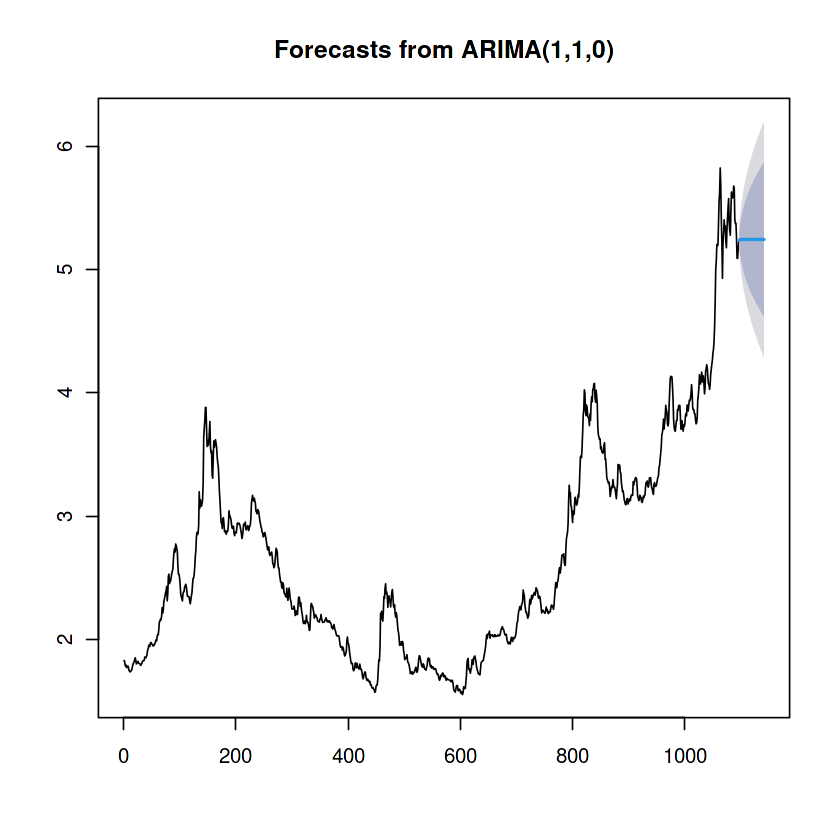

In [39]:
#ARIMA - Classical
fitARIMA = arima(train,order=c(1,1,0)) 
coeftest(fitARIMA)
summary(fitARIMA)
predARIMA = forecast::forecast(fitARIMA,h=length(test))
plot(predARIMA)

a1<-forecast::accuracy(predARIMA, test);a1
smape(test,predARIMA$mean)

ETS(M,Ad,N) 

Call:
 ets(y = train) 

  Smoothing parameters:
    alpha = 0.9986 
    beta  = 0.25 
    phi   = 0.8 

  Initial states:
    l = 1.8308 
    b = -0.0204 

  sigma:  0.017

     AIC     AICc      BIC 
787.5855 787.6626 817.5820 

Training set error measures:
                     ME       RMSE        MAE        MPE     MAPE      MASE
Training set 0.00160494 0.05269905 0.03408837 0.04816829 1.202659 0.9661826
                 ACF1
Training set 0.112418

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,0.00160494,0.05269905,0.03408837,0.04816829,1.202659,0.9661826,0.1124180,NA
Test set,0.09906208,0.22011429,0.18022682,1.71649551,3.311988,5.1082529,0.8898988,2.430073


[1] 0.03366185

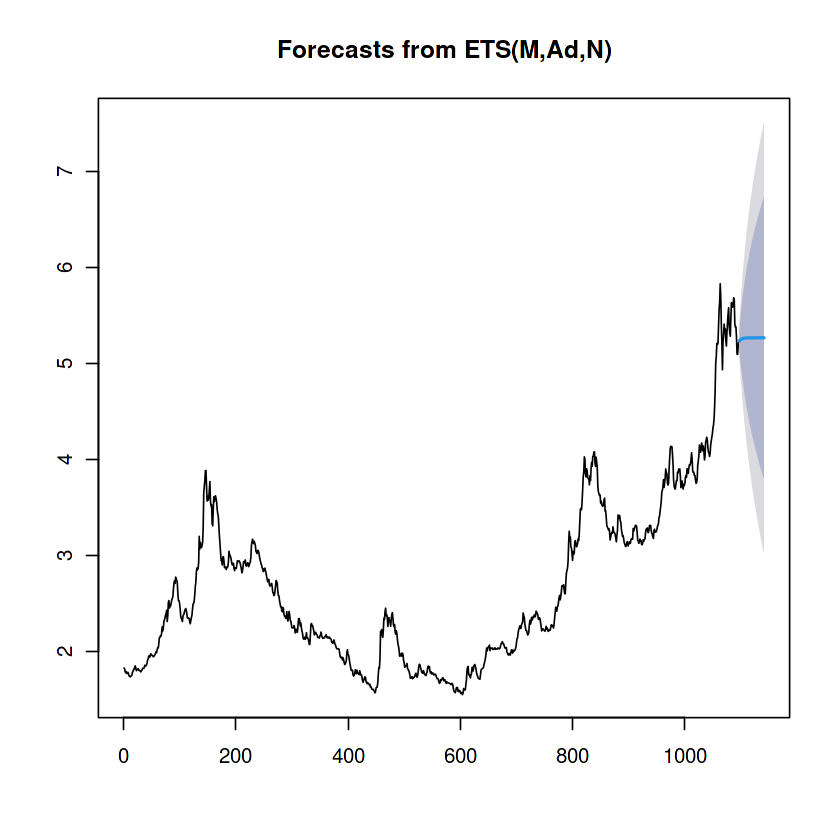

In [40]:
# fitting ETS  -- Smoothing Basic
fitETS=ets(train)
summary(fitETS)
predETS=forecast::forecast(fitETS, h=length(test))
plot(predETS)

a2<-forecast::accuracy(predETS, test);a2
smape(test,predETS$mean)

,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,0.1565893,0.2493783,0.1978571,2.793225,3.611615,0.8802081,2.734466


[1] 0.03703159

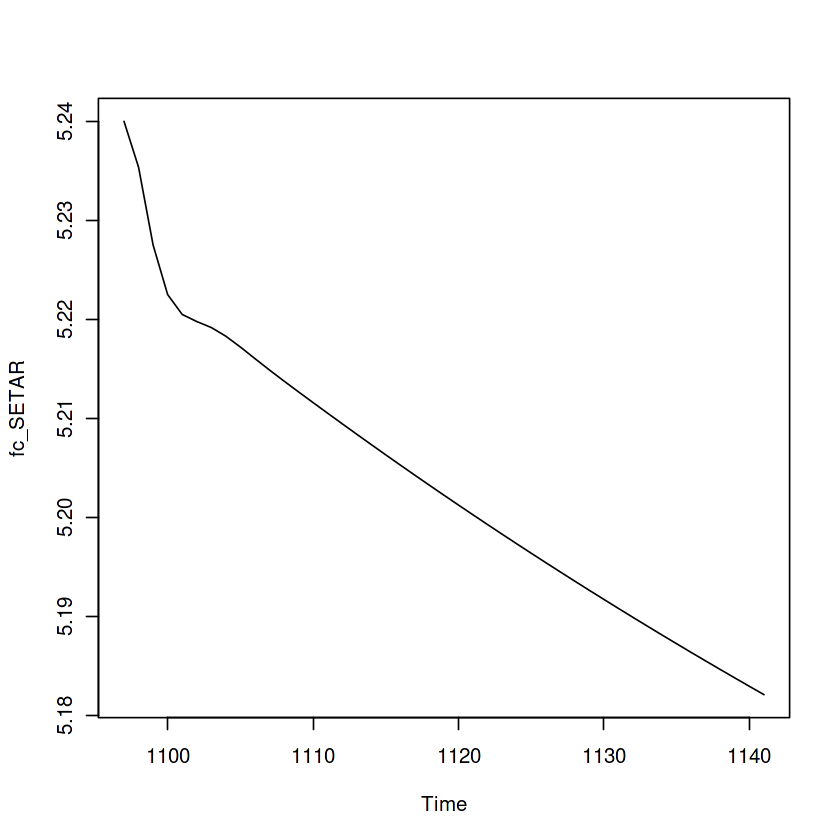

In [41]:
#SETAR - Classical
fit_SETAR = setar(train, m=4)
fc_SETAR = predict(fit_SETAR, n.ahead = length(test))
plot(fc_SETAR)
#How to determine M?

a3<-forecast::accuracy(fc_SETAR, test);a3
smape(test, fc_SETAR)

                  Length Class  Mode     
lambda               1   -none- numeric  
alpha                1   -none- numeric  
beta                 0   -none- NULL     
damping.parameter    0   -none- NULL     
gamma.values         0   -none- NULL     
ar.coefficients      0   -none- NULL     
ma.coefficients      0   -none- NULL     
likelihood           1   -none- numeric  
optim.return.code    1   -none- numeric  
variance             1   -none- numeric  
AIC                  1   -none- numeric  
parameters           2   -none- list     
seed.states          1   -none- numeric  
fitted.values     1096   ts     numeric  
errors            1096   ts     numeric  
x                 1096   -none- numeric  
seasonal.periods     0   -none- NULL     
y                 1096   ts     numeric  
call                 2   -none- call     
series               1   -none- character
method               1   -none- character

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,0.00231538,0.05172692,0.03373409,0.06199921,1.192579,0.956141,0.01271041,NA
Test set,0.12613296,0.23292262,0.18686768,2.22269670,3.420905,5.296478,0.88709724,2.560316


[1] 0.03492617

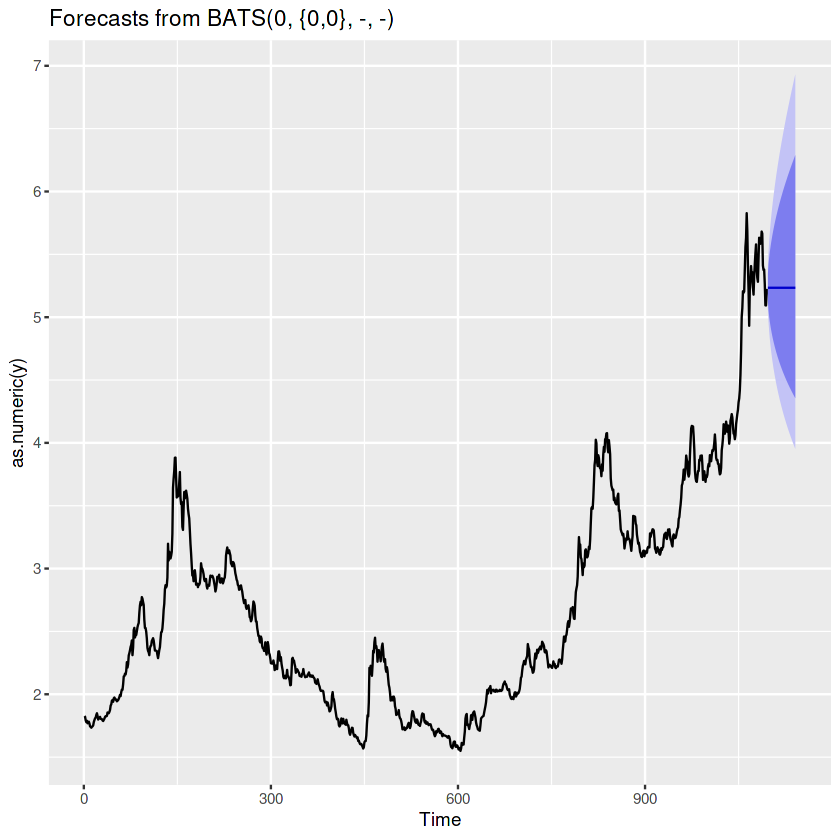

In [42]:
#TBATS - Smotthing
fit_tbats = tbats(train)
summary(fit_tbats)
predTBATS=forecast::forecast(fit_tbats, h=length(test))
autoplot(predTBATS)

a4<-forecast::accuracy(predTBATS, test);a4
smape(test,predTBATS$mean)

,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,0.1169652,0.2297394,0.1865129,2.050286,3.419572,0.8917424,2.528282


[1] 0.03485995

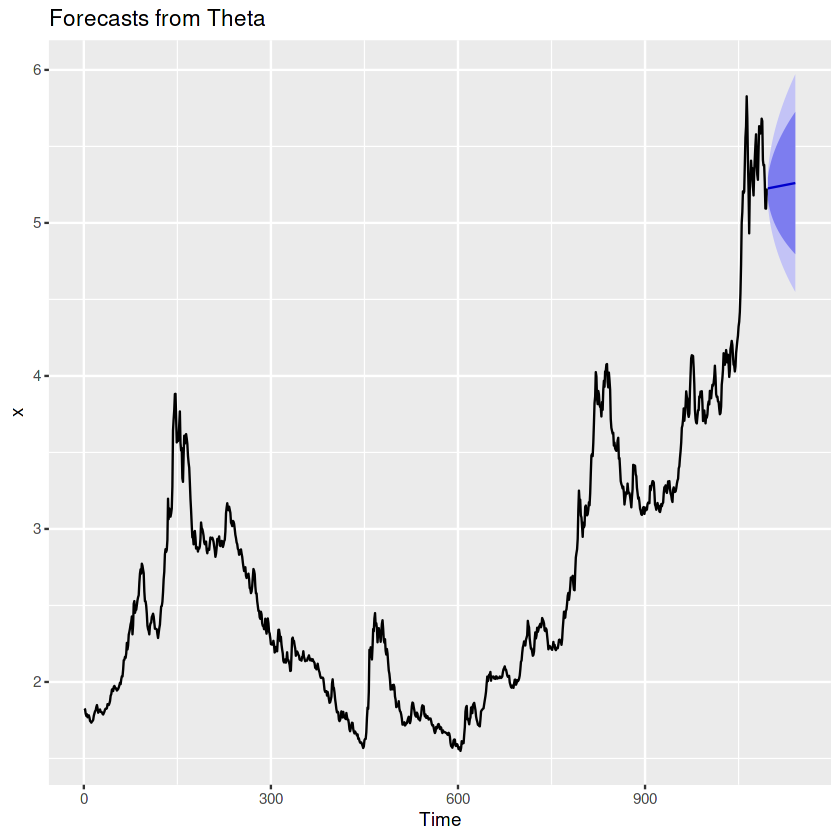

In [43]:
#Theta -- Smotthing
fit_theta=thetaf(train, h=length(test))
autoplot(fit_theta)

a5<-forecast::accuracy(fit_theta$mean, test);a5
smape(test,fit_theta$mean)

,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,0.7552675,0.8145477,0.7552675,14.01383,14.01383,0.8616999,9.127019


[1] 0.1525058

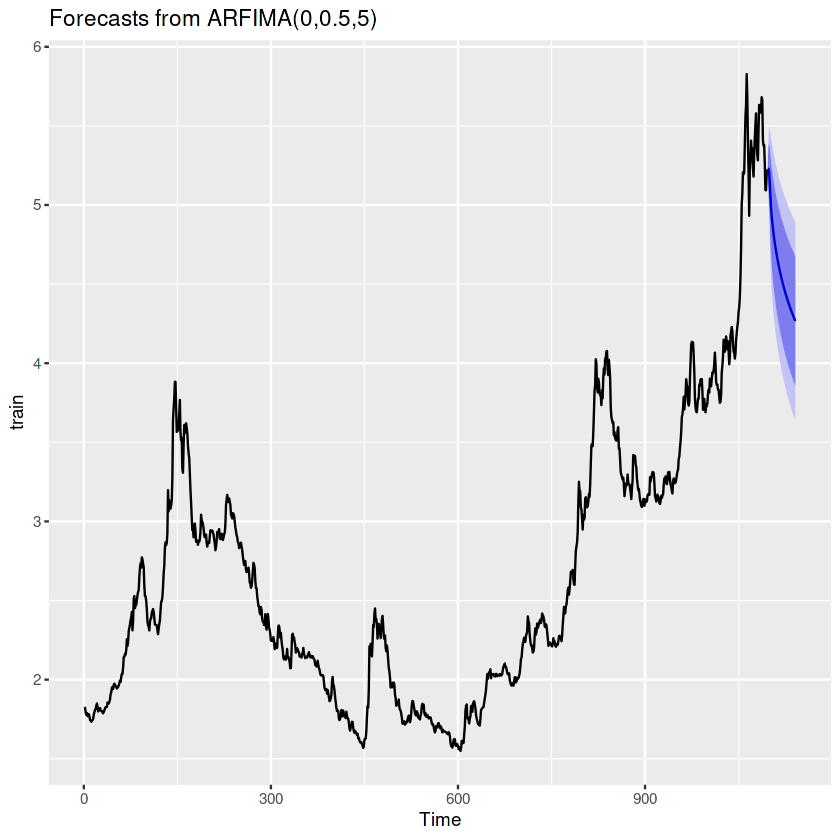

In [44]:
#ARFIMA model -- Classical
fit_ARFIMA=arfima(train)
predARFIMA = forecast::forecast(fit_ARFIMA, h=length(test))
autoplot(predARFIMA)

a6<-forecast::accuracy(predARFIMA$mean, test);a6
smape(test,predARFIMA$mean)

In [ ]:
#fitting ANN -- ML Model
fit_ANN = mlp(train)
predANN = forecast::forecast(fit_ANN, h=length(test))
autoplot(predANN)

a7<-forecast::accuracy(predANN$mean, test);a7
smape(test,predANN$mean)

,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,-0.04070309,0.2024647,0.1691458,-0.8944939,3.185993,0.8940278,2.331744


[1] 0.03154635

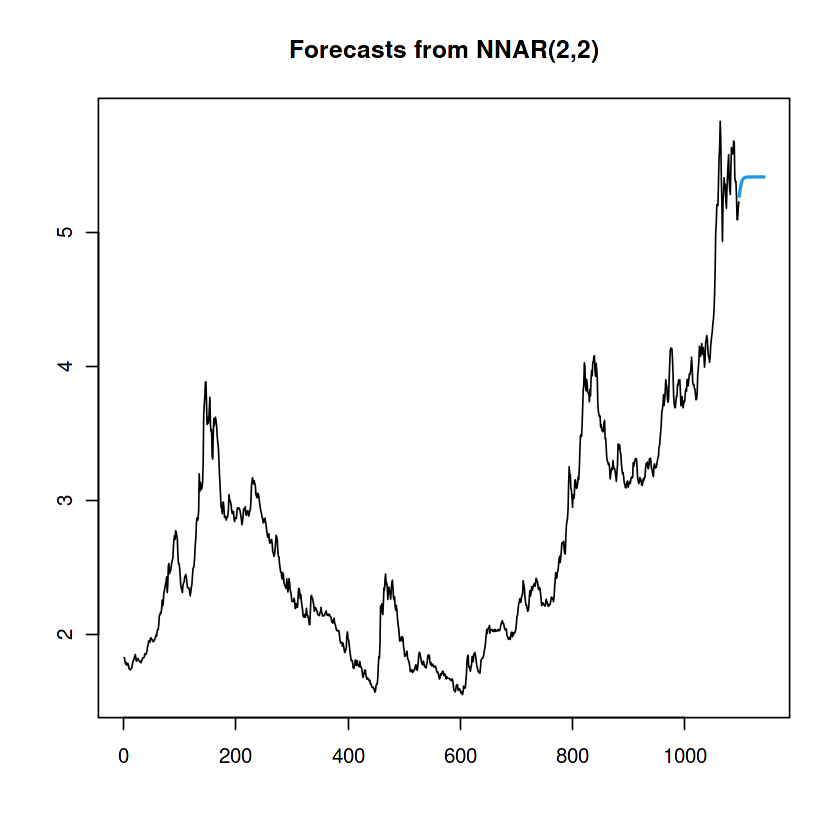

In [45]:
#fitting ARNN model -- ML Model
fit_ARNN = nnetar(train)
predARNN=forecast::forecast(fit_ARNN, h= length(test))
plot(predARNN)

a8<-forecast::accuracy(predARNN$mean, test);a8
smape(test, predARNN$mean)

,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,0.1110966,0.2251147,0.1819449,1.941809,3.336745,0.8873239,2.479652


[1] 0.03398794

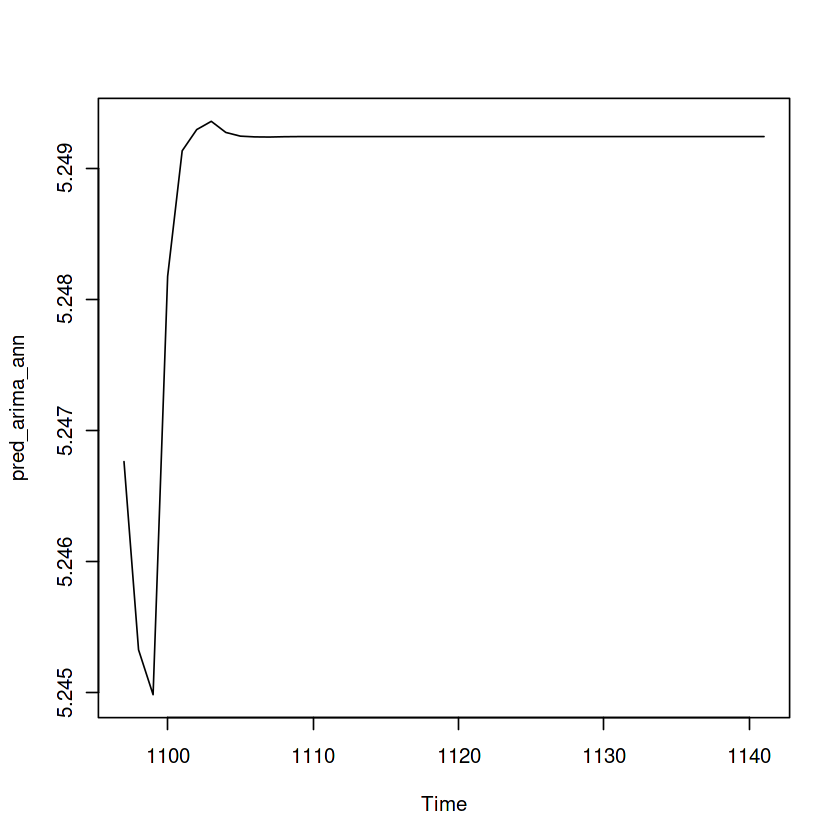

In [46]:
#fitting ARIMA + ANN hyybrid
fit_res_ANN=mlp(fitARIMA$residuals)
pred_res_ANN = forecast::forecast(fit_res_ANN, h=length(test))
pred_arima_ann=predARIMA$mean+pred_res_ANN$mean
plot(pred_arima_ann)

a9<-forecast::accuracy(pred_arima_ann, test);a9
smape(test,pred_arima_ann)

,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,0.110213,0.2275334,0.1836373,1.923307,3.368763,0.8827816,2.506555


[1] 0.0343121

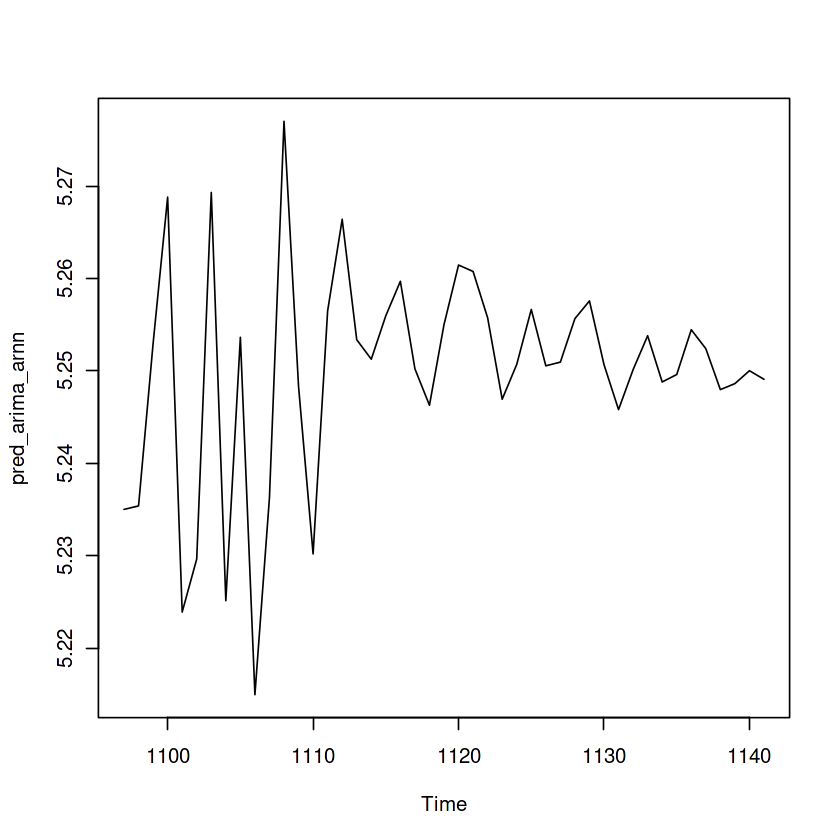

In [47]:
#fitting ARIMA + ARNN hybrid
fit_res_ARNN=nnetar(fitARIMA$residuals)
pred_res_ARNN = forecast::forecast(fit_res_ARNN, h=length(test))
pred_arima_arnn=predARIMA$mean+pred_res_ARNN$mean
plot(pred_arima_arnn)

a10<-forecast::accuracy(pred_arima_arnn, test);a10
smape(test,pred_arima_arnn)

,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,0.1151302,0.2278576,0.1848454,2.016619,3.389399,0.8897357,2.508356


[1] 0.03454099

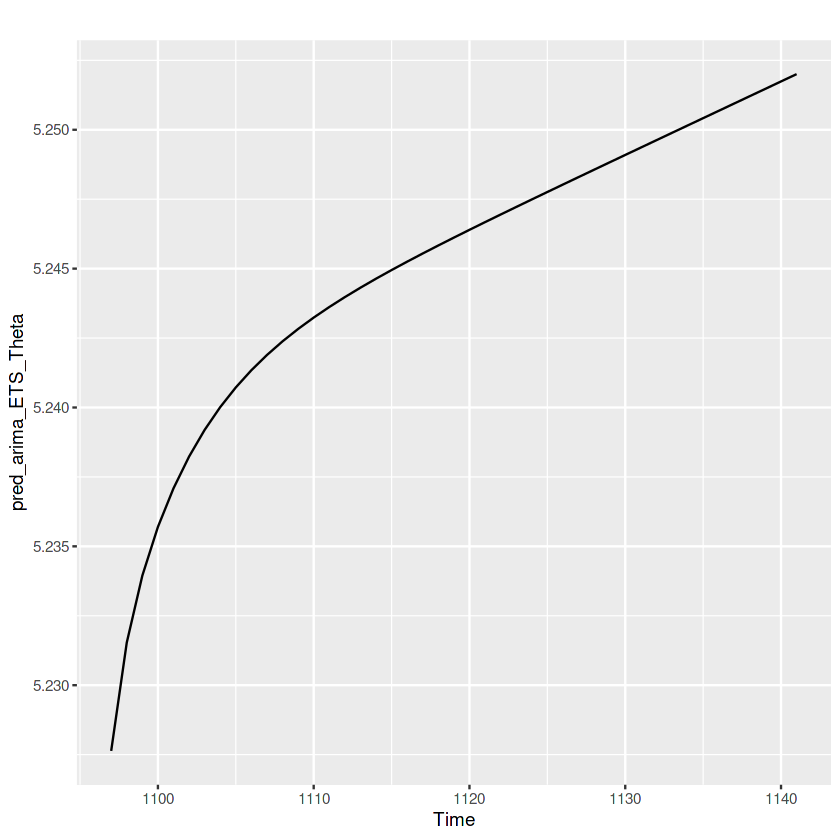

In [48]:
#ARIMA+ETS+THETA
pred_arima_ETS_Theta = ((0.333*predARIMA$mean) + (0.333*predETS$mean) + (0.333*fit_theta$mean))
autoplot(pred_arima_ETS_Theta)

a11<-forecast::accuracy(pred_arima_ETS_Theta, test);a11
smape(test,pred_arima_ETS_Theta)

,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,0.06262661,0.2062437,0.1719858,1.036008,3.178525,0.8911291,2.296425


[1] 0.03209964

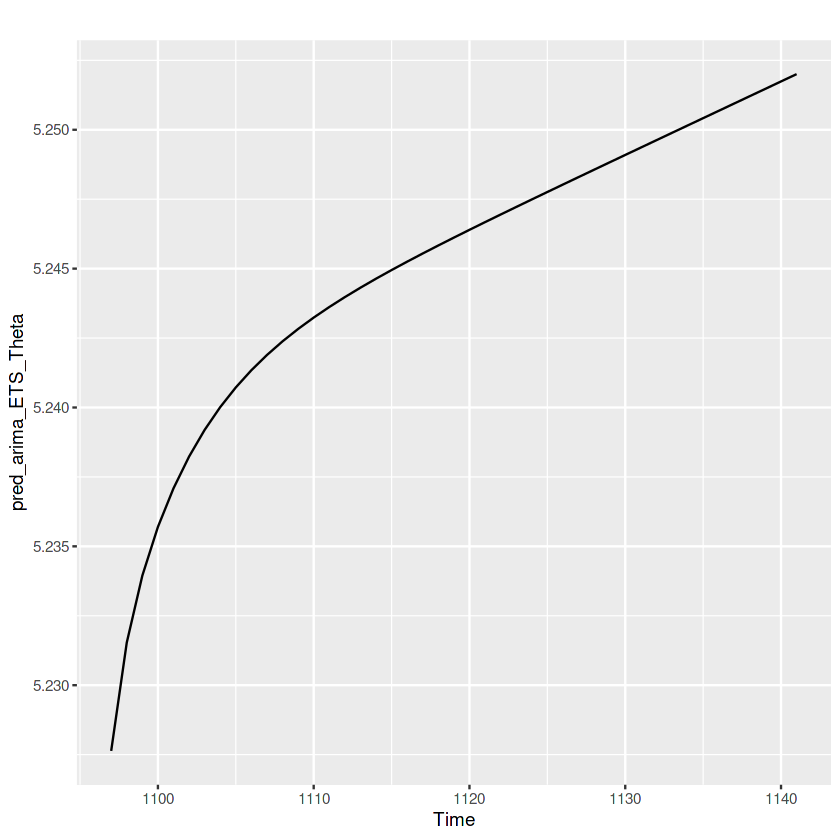

In [49]:
#ARIMA+ETS+ARNN
pred_arima_ETS_ARNN = ((0.333*predARIMA$mean) + (0.333*predETS$mean) + (0.333*predARNN$mean))
autoplot(pred_arima_ETS_Theta)

a12<-forecast::accuracy(pred_arima_ETS_ARNN, test);a12
smape(test,pred_arima_ETS_ARNN)

,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,0.06858836,0.2084568,0.1734617,1.14716,3.202649,0.8917906,2.317133


[1] 0.03237898

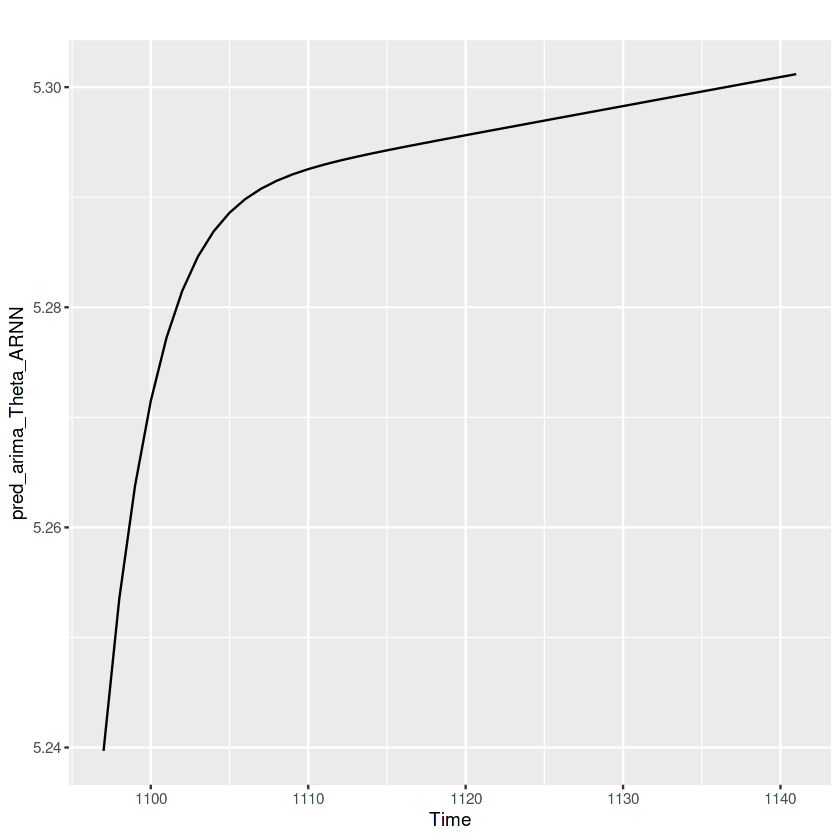

In [50]:
#ARIMA+theta+ARNN
pred_arima_Theta_ARNN = ((0.333*predARIMA$mean) + (0.333*fit_theta$mean) + (0.333*predARNN$mean))
autoplot(pred_arima_Theta_ARNN)

a13<-forecast::accuracy(pred_arima_Theta_ARNN, test);a13
smape(test,pred_arima_Theta_ARNN)

,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,0.06374304,0.207261,0.1733395,1.056472,3.203421,0.8924705,2.307148


[1] 0.03235604

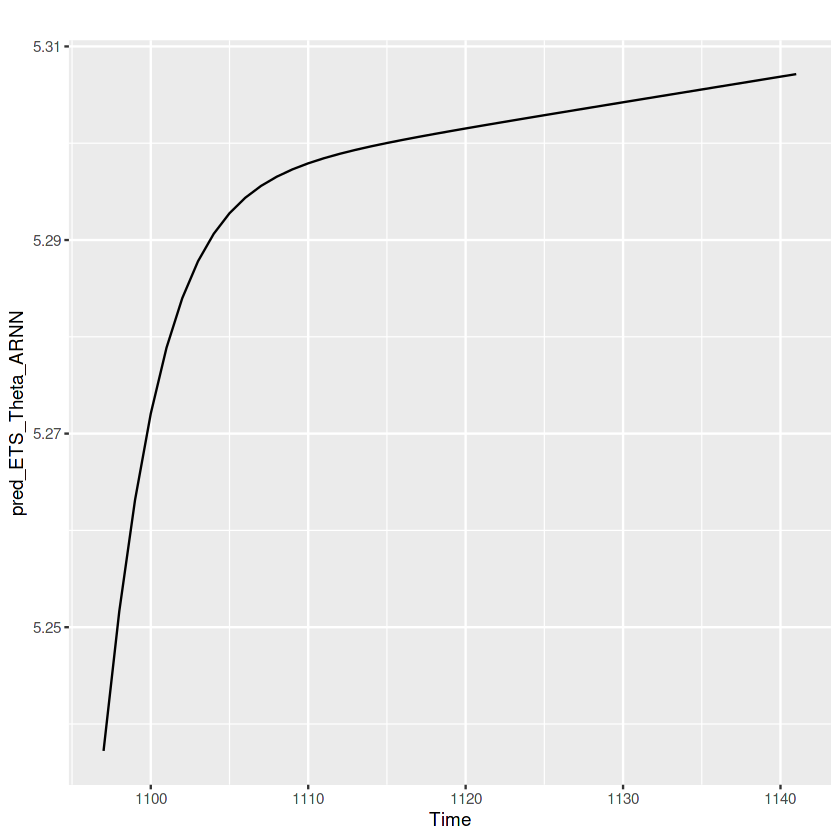

In [51]:
#ETS+theta+ARNN
pred_ETS_Theta_ARNN = ((0.333*predETS$mean) + (0.333*fit_theta$mean) + (0.333*predARNN$mean))
autoplot(pred_ETS_Theta_ARNN)

a14<-forecast::accuracy(pred_ETS_Theta_ARNN, test);a14
smape(test,pred_ETS_Theta_ARNN)

In [52]:
#ANN+ARNN+WARIMA

,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,0.113969,0.2278812,0.1809299,2.013963,3.323812,0.8945639,2.513527


[1] 0.03393793

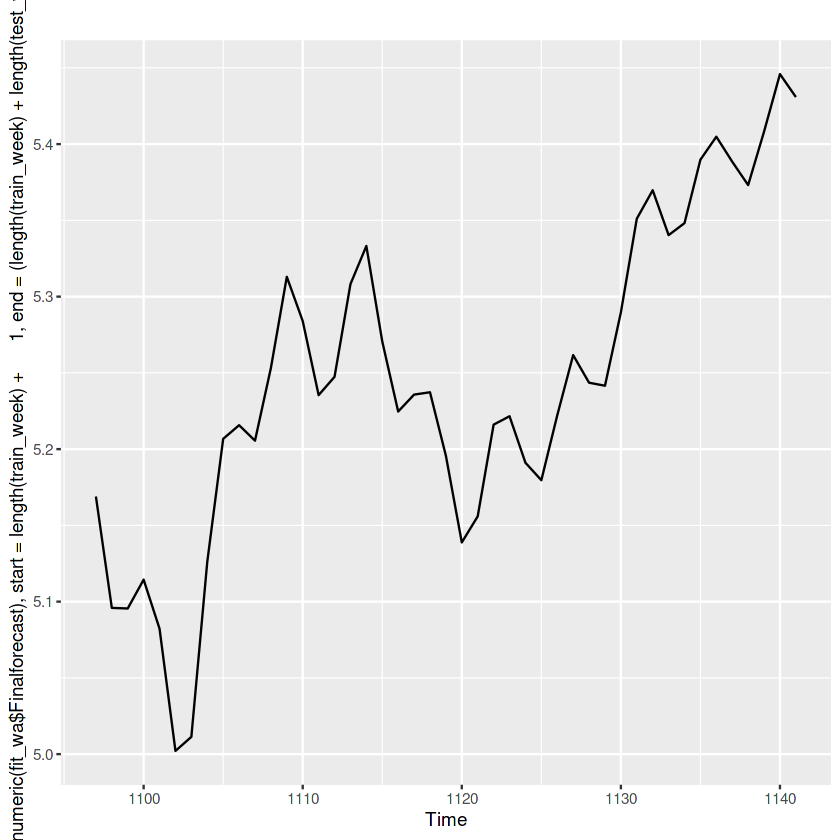

In [53]:
#WaveletArima -- Advanced
fit_wa <- WaveletFittingarma(train, Waveletlevels = floor(log(length(train))), boundary = 'periodic', FastFlag = TRUE, MaxARParam = 5, MaxMAParam = 5, NForecast = length(test))
autoplot(ts(as.numeric(fit_wa$Finalforecast), start = length(train_week)+1, end = (length(train_week) + length(test_week))))

a15<-forecast::accuracy(fit_wa$Finalforecast, test);a15
smape(test,fit_wa$Finalforecast)

,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,0.1187299,0.2311764,0.1829717,2.102743,3.359749,0.8928057,2.547467


[1] 0.03433261

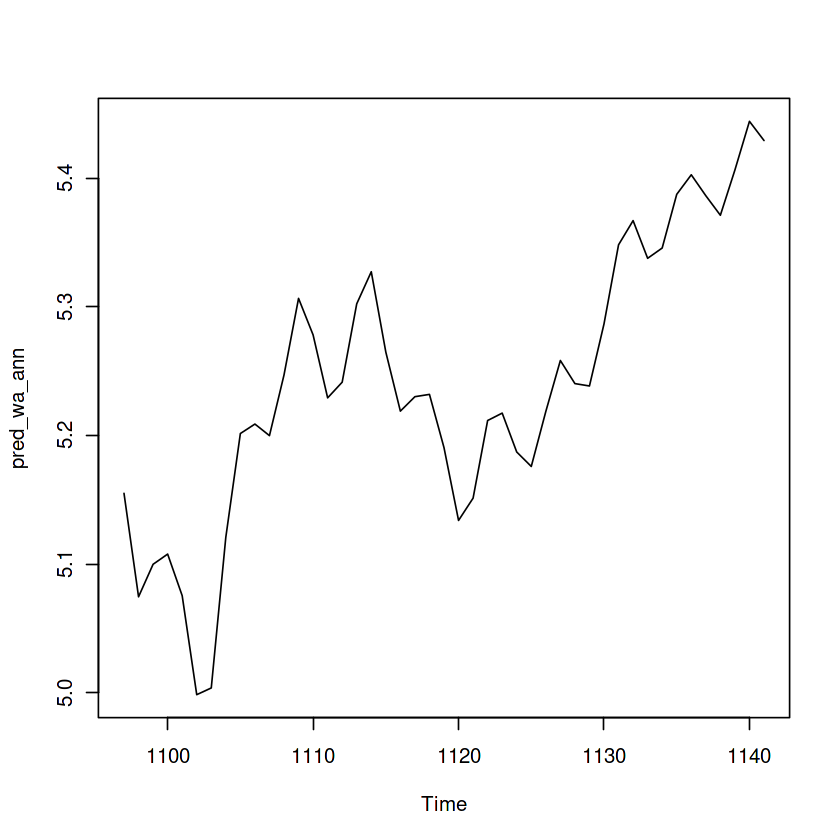

In [54]:
#fitting WARIMA+ANN hybrid model
res_wa = train - fit_wa$FinalPrediction
fit_wa_ANN=mlp(res_wa)
pred_wa_ANN = forecast::forecast(fit_wa_ANN, h=length(test))
pred_wa_ann=fit_wa$Finalforecast+pred_wa_ANN$mean
a16<-forecast::accuracy(pred_wa_ann, test);a16
plot(pred_wa_ann)

smape(test,pred_wa_ann)

,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,0.1084465,0.2245452,0.1765998,1.910976,3.244026,0.8793054,2.482975


[1] 0.03310833

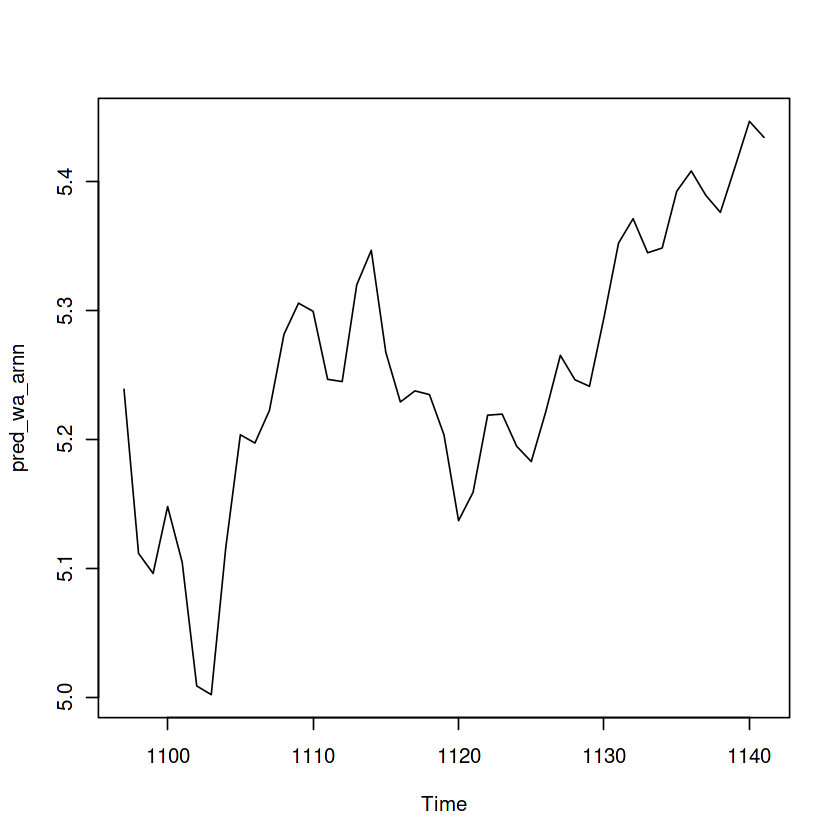

In [55]:
#fitting WARIMA + ARNN hybrid model
fit_wa_ARNN = nnetar(res_wa)
pred_wa_ARNN = forecast::forecast(fit_wa_ARNN, h=length(test))
pred_wa_arnn=fit_wa$Finalforecast+pred_wa_ARNN$mean
a17<-forecast::accuracy(pred_wa_arnn, test);a17
plot(pred_wa_arnn)

smape(test,pred_wa_arnn)

,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,0.1046129,0.2227817,0.1820326,1.820388,3.342772,0.8864913,2.456166


[1] 0.03400749

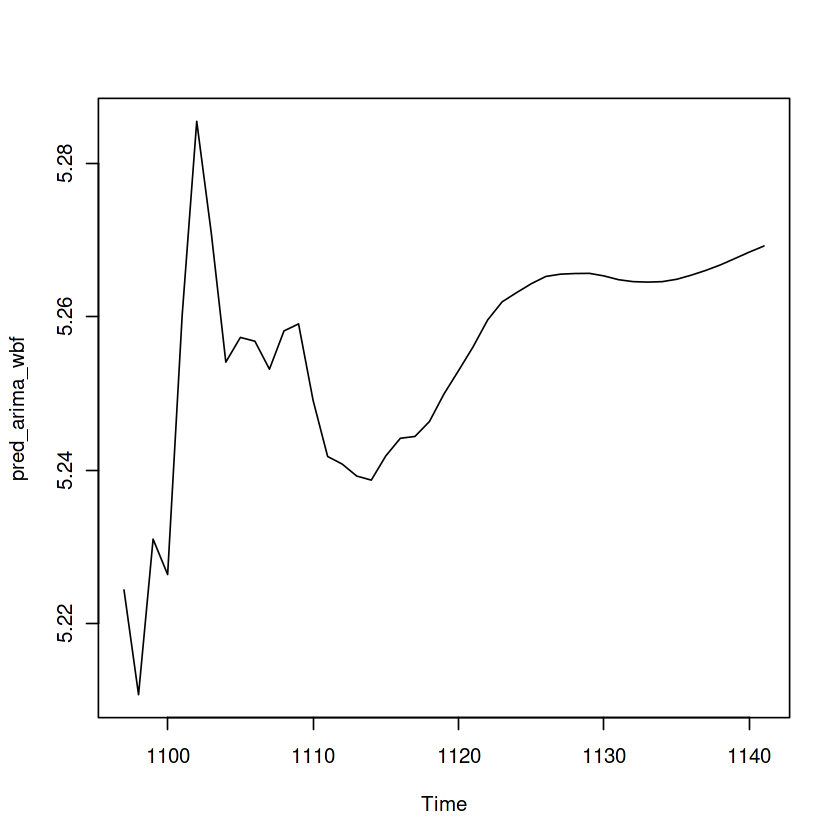

In [56]:
#fitting ARIMA + WARIMA hybrid model
fit_res_wbf=WaveletFittingarma(fitARIMA$residuals, Waveletlevels = floor(log(length(train))), boundary = 'periodic', FastFlag = TRUE, MaxARParam = 5, MaxMAParam = 5, NForecast = length(test))

pred_arima_wbf=predARIMA$mean+fit_res_wbf$Finalforecast
a18<-forecast::accuracy(pred_arima_wbf, test);a18
plot(pred_arima_wbf)

smape(test,pred_arima_wbf)

=-=-=-=-= Iteration 0 Fri Dec 17 09:43:43 2021 =-=-=-=-=
=-=-=-=-= Iteration 900 Fri Dec 17 09:43:50 2021 =-=-=-=-=
=-=-=-=-= Iteration 1800 Fri Dec 17 09:43:58 2021 =-=-=-=-=
=-=-=-=-= Iteration 2700 Fri Dec 17 09:44:05 2021 =-=-=-=-=
=-=-=-=-= Iteration 3600 Fri Dec 17 09:44:13 2021 =-=-=-=-=
=-=-=-=-= Iteration 4500 Fri Dec 17 09:44:20 2021 =-=-=-=-=
=-=-=-=-= Iteration 5400 Fri Dec 17 09:44:28 2021 =-=-=-=-=
=-=-=-=-= Iteration 6300 Fri Dec 17 09:44:35 2021 =-=-=-=-=
=-=-=-=-= Iteration 7200 Fri Dec 17 09:44:43 2021 =-=-=-=-=
=-=-=-=-= Iteration 8100 Fri Dec 17 09:44:50 2021 =-=-=-=-=


,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,0.3939948,0.4533294,0.3939948,7.243949,7.243949,0.8576561,5.021265


[1] 0.07604484

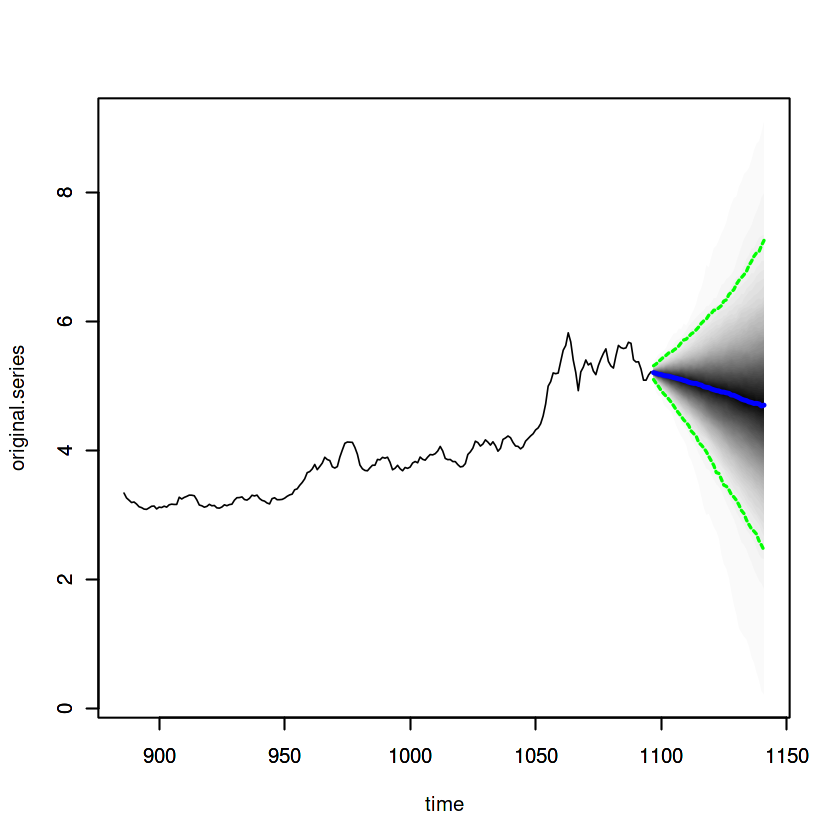

In [57]:
#fitting BSTS model -- Advanced
ss <- AddLocalLinearTrend(list(), train)
fit_bsts=bsts(train,state.specification = ss, niter = 9000)
predBSTS <- predict(fit_bsts, horizon = length(test))
plot(predBSTS, plot.original = 211)

burn <- SuggestBurn(0.1, fit_bsts)
fitted_bsts=as.numeric(-colMeans(fit_bsts$one.step.prediction.errors[-(1:burn),])+train)

a19<-forecast::accuracy(predBSTS$mean, test);a19
smape(test,predBSTS$mean)

,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,0.1351978,0.2379535,0.1906314,2.39204,3.486894,0.8870972,2.612917


[1] 0.03564524

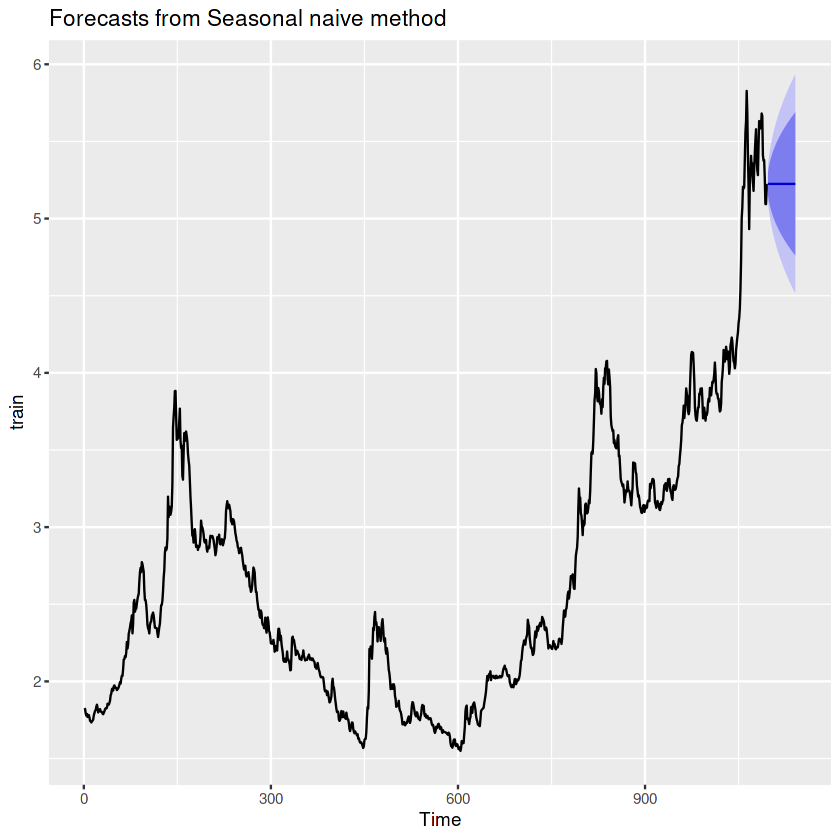

In [58]:
#Snaive - ARIMA(0,0,0)(0,1,0)m  --  Classical
fit_snaive = snaive(train, h=length(test))
autoplot(fit_snaive)

a20<-forecast::accuracy(fit_snaive$mean, test);a20
smape(test,fit_snaive$mean)

,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,0.1352029,0.2379564,0.1906338,2.392136,3.486937,0.8870972,2.612947


[1] 0.0356457

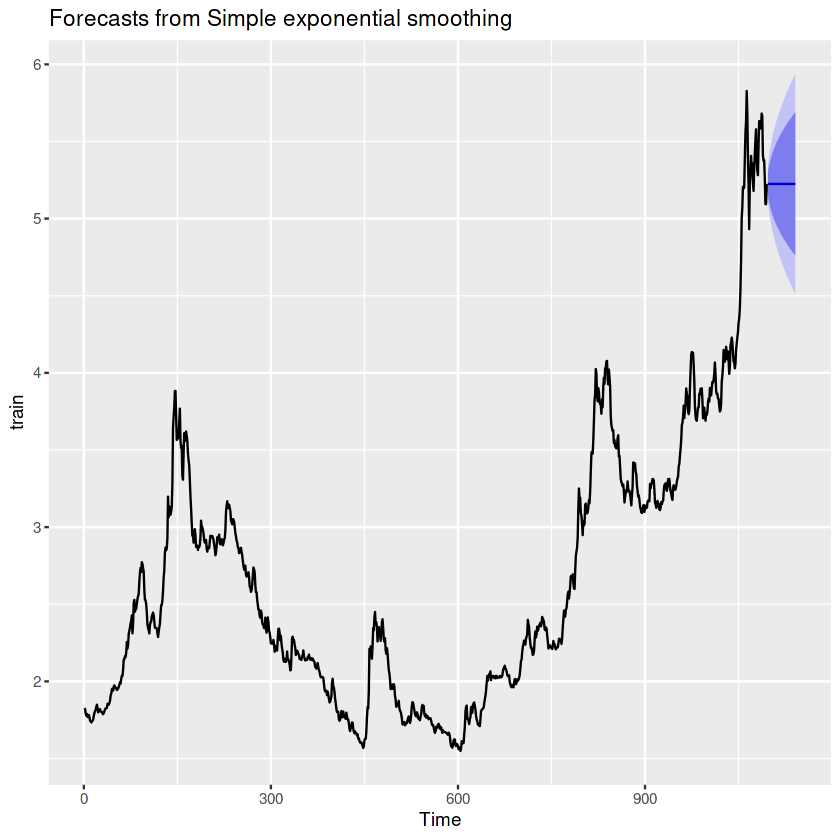

In [59]:
#Ses --  Simple exponential smoothing
fit_ses = ses(train, h=length(test))
autoplot(fit_ses)

a21<-forecast::accuracy(fit_ses$mean, test);a21
smape(test,fit_ses$mean)

In [60]:
#Dynamic regression ARIMA model is discussed in paper 2, 
#but in the fourier, the K (wavenumber) must not be greater than period/2 ,period here is 1 
#m1
# xreg <- fourier(train, K=1)
# model <- auto.arima(train, xreg = xreg, seasonal = FALSE)
# xreg1 <- fourier(train, K=1, h = length(test))
# Pred1 <- forecast(model, xreg = xreg1)
# autoplot(Pred1)

# a22<-forecast::accuracy(Pred1, test);a22
# smape(test,Pred$mean)

**Catboost**

In [61]:
# Importing Catboost
failed_loading_catboost = FALSE
tryCatch(library(catboost), error = function(err) {failed_loading_catboost<<-TRUE})

In [62]:
# Initializing Catboost parameters
lag=1
embedded_series <- NULL
series_means <- NULL
mean <- mean(train)
train_cat <- train/mean
series_means <- c(series_means, mean)
embedded <- embed(train_cat, lag + 1)
embedded_series <- rbind(embedded_series, embedded)

final_lags <- NULL
current_series_final_lags <- t(as.matrix(rev(tail(train_cat, lag))))
final_lags_cat <- rbind(final_lags, current_series_final_lags)

In [63]:
# Fitting the CatBoost model
if (failed_loading_catboost) stop("Error when loading catboost, cannot run global model based on catboost")
    train_pool <- catboost.load_pool(data = as.matrix(embedded_series[,-1]),label=as.matrix(embedded_series[,1]))
    model_cat <- catboost.train(train_pool)

Training catboost with default parameters! See help(catboost.train).



Learning rate set to 0.039666
0:	learn: 0.3267275	total: 50.1ms	remaining: 50s
1:	learn: 0.3152163	total: 51ms	remaining: 25.5s
2:	learn: 0.3037840	total: 52.1ms	remaining: 17.3s
3:	learn: 0.2925434	total: 53ms	remaining: 13.2s
4:	learn: 0.2821640	total: 54ms	remaining: 10.7s
5:	learn: 0.2721307	total: 55ms	remaining: 9.1s
6:	learn: 0.2622931	total: 56ms	remaining: 7.94s
7:	learn: 0.2526864	total: 56.9ms	remaining: 7.05s
8:	learn: 0.2439553	total: 57.8ms	remaining: 6.37s
9:	learn: 0.2353699	total: 58.8ms	remaining: 5.82s
10:	learn: 0.2268051	total: 59.7ms	remaining: 5.37s
11:	learn: 0.2188611	total: 60.8ms	remaining: 5s
12:	learn: 0.2112559	total: 61.5ms	remaining: 4.67s
13:	learn: 0.2039082	total: 62.4ms	remaining: 4.4s
14:	learn: 0.1965543	total: 63.4ms	remaining: 4.16s
15:	learn: 0.1892830	total: 64.4ms	remaining: 3.96s
16:	learn: 0.1828586	total: 65.4ms	remaining: 3.78s
17:	learn: 0.1762847	total: 66.3ms	remaining: 3.62s
18:	learn: 0.1700341	total: 67.2ms	remaining: 3.47s
19:	learn

In [64]:
# Predictions in Catboost model
predictions <- NULL
for (i in 1:length(test)){
    catboost_final_lags <- catboost.load_pool(final_lags_cat)
    new_predictions <- catboost.predict(model_cat, catboost_final_lags)
    predictions <- cbind(predictions, new_predictions)
    if(i < length(test)){
      final_lags_cat <- final_lags_cat[-lag]
      final_lags_cat <- cbind(new_predictions, final_lags_cat)
      colnames(final_lags_cat)[1:lag] <- paste("Lag", 1:lag, sep="")
      final_lags_cat <- as.data.frame(final_lags_cat)
    }
  }

pred = list()
for(i in 1:length(test)){
    pred[i] <- predictions[i]
}
pred = as.numeric(pred)
predictions_cat <- pred * as.vector(series_means)

In [65]:
# Catboots Accuracy
smape(test,predictions_cat)
a23<-forecast::accuracy(predictions_cat,test);a23

[1] 0.04251039

,ME,RMSE,MAE,MPE,MAPE,ACF1,Theil's U
Test set,0.2005239,0.2801329,0.2262893,3.612571,4.126711,0.8892797,3.061284


**Pool regression**

In [66]:
# Initializing Pool regression paramters
final_lags_poolreg <- final_lags
current_series_final_lags <- t(as.matrix(rev(tail(train_cat, lag))))
final_lags_poolreg <- rbind(final_lags_poolreg, current_series_final_lags)
colnames(final_lags_poolreg)[1:lag] <- paste("Lag", 1:lag, sep="")

embedded_series <- as.data.frame(embedded_series)
colnames(embedded_series)[1] <- "y"
colnames(embedded_series)[2:(lag + 1)] <- paste("Lag", 1:lag, sep = "")

formula <- "y ~ "
  for(predictor in 2:ncol(embedded_series)){
    if(predictor != ncol(embedded_series)){
      formula <- paste0(formula, colnames(embedded_series)[predictor], " + ")
    }else{
      formula <- paste0(formula, colnames(embedded_series)[predictor])
    }
  }

formula <- paste(formula, "+ 0", sep="")
formula <- as.formula(formula)

In [67]:
# Fitting Pool Regression model
model_pool_reg <- glm(formula = formula, data = embedded_series)

In [68]:
# Predictions in Pool regression model
predictions <- NULL
for (i in 1:length(test)){
    new_predictions <- predict.glm(object = model_pool_reg, newdata = as.data.frame(final_lags_poolreg))
    predictions <- cbind(predictions, new_predictions)
    if(i < length(test)){
      final_lags_poolreg <- final_lags_poolreg[-lag]
      final_lags_poolreg <- cbind(new_predictions, final_lags_poolreg)
      colnames(final_lags_poolreg)[1:lag] <- paste("Lag", 1:lag, sep="")
      final_lags_poolreg <- as.data.frame(final_lags_poolreg)
    }
  }

pred = list()
for(i in 1:length(test)){
    pred[i] <- predictions[i]
}
pred <- as.numeric(pred)
predictions_poolreg <- pred * as.vector(series_means)

In [69]:
# Pool regression model accuracy
smape(test,predictions_poolreg)
a24 <- forecast::accuracy(test,predictions_poolreg); a24

[1] 0.03629979

,ME,RMSE,MAE,MPE,MAPE
Test set,0.01042886,0.2246779,0.1943399,0.1610944,3.625312
